<a href="https://colab.research.google.com/github/enessibest/suicide-rate-project-/blob/main/Suicide_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/master.csv')

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
data.shape

(27820, 12)

In [ ]:
data.columns.values[9]="Gdp_year"

In [ ]:
missing_value= data.isnull().sum()
missing_value

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
Gdp_year                  0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
data1=data.drop(labels='HDI for year', axis=1)
data1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,Gdp_year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,NaN,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,NaN,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,NaN,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,NaN,2309,Generation Z


In [ ]:
data1.shape

(27820, 11)

In [ ]:
data1.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
Gdp_year              float64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
cor=data1.corr()
cor

,year,suicides_no,population,suicides/100k pop,Gdp_year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,NaN,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,NaN,0.061330
population,0.008850,0.616162,1.000000,0.008285,NaN,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,NaN,0.001785
Gdp_year,NaN,NaN,NaN,NaN,NaN,NaN
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,NaN,1.000000


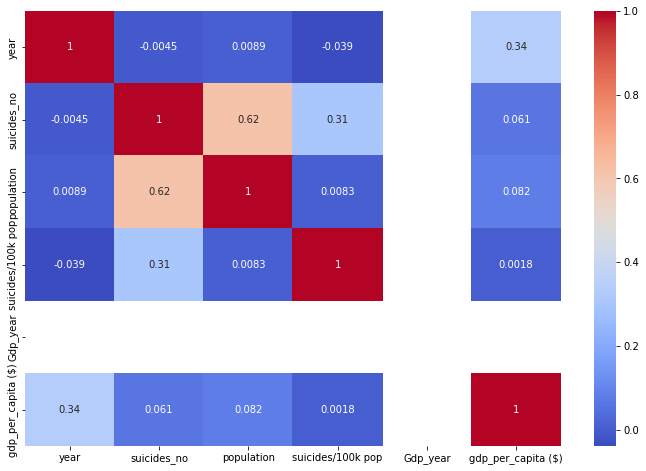

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data1=data1.drop(['country','age'],axis=1)

In [ ]:
df=pd.get_dummies(data1,columns=['sex'])

In [ ]:
df.head()

,year,suicides_no,population,suicides/100k pop,country-year,Gdp_year,gdp_per_capita ($),generation,sex_female,sex_male
0,1987,21,312900,6.71,Albania1987,NaN,796,Generation X,0,1
1,1987,16,308000,5.19,Albania1987,NaN,796,Silent,0,1
2,1987,14,289700,4.83,Albania1987,NaN,796,Generation X,1,0
3,1987,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,0,1
4,1987,9,274300,3.28,Albania1987,NaN,796,Boomers,0,1


In [ ]:
data2=df.drop(['country-year',"Gdp_year",'generation'], axis = 1)

In [ ]:
data2.shape

(27820, 7)

In [ ]:
X = data2.drop(['suicides_no'], axis=1)
Y = data2['suicides_no']

In [ ]:
#MInMaxScaler
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

scaled_X = scale.fit_transform(X)
scaled_X

array([[0.06451613, 0.00713668, 0.0298262 , 0.00432193, 0.        ,
        1.        ],
       [0.06451613, 0.00702482, 0.02306974, 0.00432193, 0.        ,
        1.        ],
       [0.06451613, 0.00660706, 0.02146953, 0.00432193, 1.        ,
        0.        ],
       ...,
       [0.93548387, 0.06304952, 0.00964573, 0.01632025, 0.        ,
        1.        ],
       [0.93548387, 0.06006908, 0.00742321, 0.01632025, 1.        ,
        0.        ],
       [0.93548387, 0.03284235, 0.00648975, 0.01632025, 1.        ,
        0.        ]])

# USING KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(scaled_X,Y , test_size=0.3)

In [ ]:
accuracy_list = []
for n in range(1, 15):

  knn_model = KNeighborsClassifier(n_neighbors=n, metric="euclidean" )
  knn_model.fit (X_train, Y_train)

  pred_n = knn_model.predict(X_test)
  accuracy_list.append(round(accuracy_score(pred_n, Y_test)*100))



In [ ]:
accuracy_list

[18, 18, 18, 17, 17, 17, 18, 17, 17, 17, 17, 17, 17, 17]

In [ ]:
pred = knn_model.predict(X_test)
pred

array([147,   0,   1, ...,  32,   3,   4])

In [ ]:
print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,Y_test)*100,2)))

The accuracy of the KNN with K=3 is 17.17%


# USING NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
pred_nb = model.predict(X_test)
pred_nb

array([ 493, 1027,  550, ...,  761,  373,  373])

In [ ]:
print('The accuracy of NB is {}%'.format(round(accuracy_score(pred_nb,Y_test)*100,2)))

The accuracy of NB is 1.77%


# USING LINEAR REGRESSION 

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([ 413.25, -195.5 ,  133.  , ...,  697.25, -120.  ,   40.  ])

In [ ]:
print("Accuracy",lr.score(X_train,Y_train))

Accuracy 0.47922570082402605


# USING RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 30)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, random_state=30)

In [ ]:
test_pred = regressor.predict(X_test)
rf_score=regressor.score(X_test , Y_test)
print("The Random forest model accuracy is {}".format(rf_score))


The Random forest model accuracy is 0.9981082133922999
